# factor analysis 

Factor Analysis is a part of Exploratory Data Analysis process which is commonly used for dimensionality reduction method. It is used to reduce a large number of variables into smaller number of variables.

**The primary goal of factor analysis is to reduce number of variables and find unobservable variables.**

## 1. Suitability Tests using KMO

The Kaiser-Meyer-Olkin (KMO) test in Python is used to assess the sampling adequacy of a dataset for factor analysis. It measures the proportion of variance among the variables that might be common variance, indicating how suitable the data is for dimensionality reduction techniques like Factor Analysis. when Values closer to 1 ,Indicate that the data is highly suitable for factor analysis, suggesting strong intercorrelations among variables.

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from factor_analyzer.factor_analyzer import FactorAnalyzer 

In [8]:
df = pd.read_csv("data/gold/traffic_weather_merged.csv")

df_fac = df[["temperature_c", "rain_mm", "humidity","wind_speed_kmh","air_pressure_hpa","visibility_m_weather", "accident_count","avg_speed_kmh", "vehicle_count"]]
scaler = StandardScaler()
df_fac = pd.DataFrame(scaler.fit_transform(df_fac), columns=df_fac.columns)

In [ ]:
kmo_per_variable, kmo_total = calculate_kmo(df_fac)

print(f"KMO per variable: {kmo_per_variable}")
print(f"Overall KMO: {kmo_total}")

KMO per variable: [0.51313433 0.50621654 0.49479064 0.49103701 0.505491   0.50465847
 0.51212465 0.51623044 0.50310819]
Overall KMO: 0.5052038500393751


as shown, the kmo result is very weak because the data is fully generated.

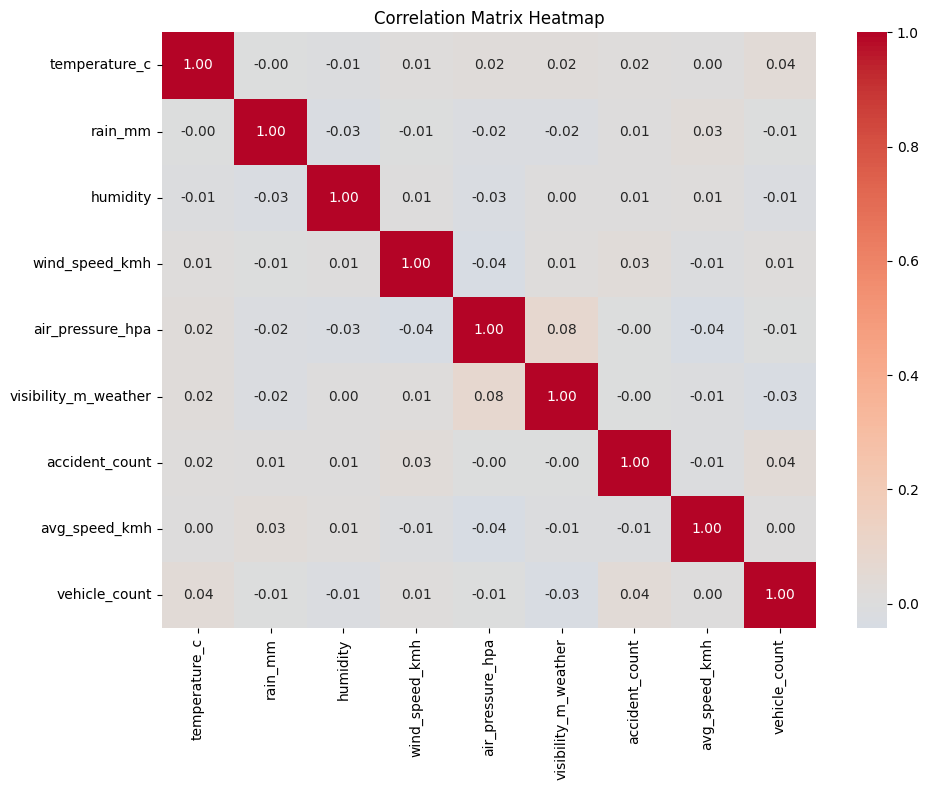

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_fac.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

The weak KMO result is expected and logical given the nature of the dataset. Since the data is fully synthetically generated without intentional correlations between variables, the correlation matrix displays uniformly weak relationships. This absence of strong intercorrelations among the variables indicates that factor analysis may not be suitable for this particular dataset, as factor analysis typically seeks to identify underlying common factors in correlated data.

In [ ]:
fa = FactorAnalyzer(rotation='varimax')
fa.fit(df_fac)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [12]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
sorted_ev = sorted(ev, reverse=True)
print("Eigenvalues:", sorted_ev)

Eigenvalues: [1.1176230017556217, 1.0778936097370837, 1.043073012439691, 1.0058213171598203, 0.9996837552797513, 0.9776143837610873, 0.952688252343981, 0.929177679401716, 0.8964249881212477]


After sorting the eigenvalues, I was able to notice that three eigenvalues were greater than 1 so we can choose 4 factors.

In [14]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df_fac)


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [18]:
factor_loadings_df = pd.DataFrame(fa.loadings_, 
                                  index=df_fac.columns,
                                  columns=['Factor1', 'Factor2', 'Factor3'])
print(factor_loadings_df)


                       Factor1   Factor2   Factor3
temperature_c         0.051022  0.121960 -0.002391
rain_mm              -0.093034 -0.024399  0.070226
humidity              0.008406 -0.022584 -0.109520
wind_speed_kmh        0.014864  0.087005 -0.141907
air_pressure_hpa      0.412299  0.017837  0.316505
visibility_m_weather  0.222881 -0.023667 -0.048502
accident_count        0.016157  0.142940 -0.042193
avg_speed_kmh        -0.099958 -0.018687 -0.002277
vehicle_count        -0.081004  0.327232  0.069591


In [20]:
# Get top 3 loadings for each factor
for factor in ['Factor1', 'Factor2', 'Factor3']:
    print(f"\nTop 3 highest loadings for {factor}:")
    factor_data = factor_loadings_df[factor].sort_values(ascending=False).head(3)
    
    # Display with original (signed) values
    for var in factor_data.index:
        original_value = factor_loadings_df.loc[var, factor]
        print(f"  {var}: {original_value:.6f}")



Top 3 highest loadings for Factor1:
  air_pressure_hpa: 0.412299
  visibility_m_weather: 0.222881
  temperature_c: 0.051022

Top 3 highest loadings for Factor2:
  vehicle_count: 0.327232
  accident_count: 0.142940
  temperature_c: 0.121960

Top 3 highest loadings for Factor3:
  air_pressure_hpa: 0.316505
  rain_mm: 0.070226
  vehicle_count: 0.069591


factor 1 > is influenced by air_pressure and  visibility features, so we can rename it to **Atmospheric Stability Factor**

factor 2 > is influenced by vehicle_count and accident_count so we can rename it to **Traffic Flow Stress Factor**

factor 3 > is influenced by air pressure and rain, so we can rename it to  **Weather Severity Factor**

In [21]:
factor_loadings_df = pd.DataFrame(fa.loadings_, 
                                  index=df_fac.columns,
                                  columns=['Atmospheric Stability Factor', 'Traffic Flow Stress Factor', 'Weather Severity Factor'])


In [22]:
factor_loadings_df.to_csv("data/gold/factor_loadings.csv")


In [23]:
report = """
Factor 1: Atmospheric Stability Factor
This factor is mainly influenced by air pressure (loading = 0.41) and to a lesser extent by visibility.
It reflects variations in atmospheric stability but has weak influence from other weather variables.

Factor 2: Traffic Flow Stress Factor
This factor loads primarily on vehicle_count (0.33), representing traffic flow levels.
Other variables have very weak contributions, indicating that traffic measures are almost independent of weather conditions in this dataset.

Factor 3: Weather Severity Factor
This factor has moderate loading from air pressure (0.31) and weak negative loadings from humidity and wind speed.
It may represent a composite measure of weather severity, but its influence on traffic variables is minimal.

Weather–Traffic Relationship:
Based on the loadings:
No meaningful weather variable shows strong correlation with traffic flow or accident count. because the data is independent and synthetic. 
but air_pressure_hpa 0.412299 has the highest influence on traffic 
"""

with open("data/gold/factor_interpretation.txt", "w") as f:
    f.write(report)